In [1]:
import pyodbc
import pandas as pd
import numpy as np
import time
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [5]:
df=cur.execute(spcJun).fetchall()

In [6]:
l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14=zip(*df)

In [10]:
df_2=pd.DataFrame(np.column_stack([l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14]),
                  columns=['merchant_number','mcc_industry','mcc_group','province','city','FSA','date_of_entry_mn','total_vol_control_SS','total_vol_event_SS','report_inclusion','exclude_this_time','final','p_total_vol_control_SS','p_total_vol_event_SS'])

In [13]:
df_2.total_vol_control_SS=df_2.total_vol_control_SS.astype('float')
df_2.total_vol_event_SS=df_2.total_vol_event_SS.astype('float')
df_2.p_total_vol_control_SS=df_2.p_total_vol_control_SS.astype('float')
df_2.p_total_vol_event_SS=df_2.p_total_vol_event_SS.astype('float')
df_2.report_inclusion=df_2.report_inclusion.astype('int')
df_2.exclude_this_time=df_2.exclude_this_time.astype('int')
df_2.final=df_2.final.astype('int')

In [14]:
df_2.describe()

,total_vol_control_SS,total_vol_event_SS,report_inclusion,exclude_this_time,final,p_total_vol_control_SS,p_total_vol_event_SS
count,2.039800e+05,2.039800e+05,203980.000000,203980.000000,203980.000000,2.039800e+05,2.039800e+05
mean,1.012904e+05,1.071204e+05,0.915070,0.031439,0.890185,9.949270e+04,1.081652e+05
std,1.273617e+06,1.400026e+06,0.278778,0.174502,0.312659,1.268349e+06,1.432817e+06
min,1.000000e-02,1.000000e-02,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,6.030775e+03,6.139077e+03,1.000000,0.000000,1.000000,5.539425e+03,5.821825e+03
50%,2.161361e+04,2.213396e+04,1.000000,0.000000,1.000000,2.098694e+04,2.231932e+04
75%,6.836385e+04,7.125085e+04,1.000000,0.000000,1.000000,6.704665e+04,7.177779e+04
max,2.650839e+08,2.678848e+08,1.000000,1.000000,1.000000,2.524211e+08,2.855006e+08


In [15]:
df_2=df_2.dropna()

In [16]:
def delta_d(x):
    td=date.today()
    x=x.date()
    return (td-x).days

In [17]:
df_2['age']=round(df_2.date_of_entry_mn.apply(delta_d)/365,2)

In [18]:
df_2=df_2.drop(['date_of_entry_mn'],axis=1)

In [19]:
df_2['c_delta%']=(df_2.total_vol_event_SS-df_2.total_vol_control_SS)/df_2.total_vol_control_SS

In [20]:
df_2['p_delta%']=(df_2.p_total_vol_event_SS-df_2.p_total_vol_control_SS)/df_2.p_total_vol_control_SS

In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203980 entries, 0 to 203979
Data columns (total 16 columns):
merchant_number           203980 non-null object
mcc_industry              203980 non-null object
mcc_group                 203980 non-null object
province                  203980 non-null object
city                      203980 non-null object
FSA                       203980 non-null object
total_vol_control_SS      203980 non-null float64
total_vol_event_SS        203980 non-null float64
report_inclusion          203980 non-null int32
exclude_this_time         203980 non-null int32
final                     203980 non-null int32
p_total_vol_control_SS    203980 non-null float64
p_total_vol_event_SS      203980 non-null float64
age                       203980 non-null float64
c_delta%                  203980 non-null float64
p_delta%                  196470 non-null float64
dtypes: float64(7), int32(3), object(6)
memory usage: 24.1+ MB


In [22]:
df_2=df_2.set_index('merchant_number')

In [25]:
df_o=df_2.copy(deep=True)

In [26]:
# encode -mcc_industry-mcc_group-province-city-FSA

In [27]:
df_o.mcc_industry=df_o.mcc_industry.astype('category')
df_o.mcc_industry= df_o.mcc_industry.cat.codes
df_o.mcc_group=df_o.mcc_group.astype('category')
df_o.mcc_group= df_o.mcc_group.cat.codes
#df_o.mcc_definition=df_o.mcc_definition.astype('category')
#df_o.mcc_definition= df_o.mcc_definition.cat.codes
df_o.province=df_o.province.astype('category')
df_o.province= df_o.province.cat.codes
df_o.city=df_o.city.astype('category')
df_o.city= df_o.city.cat.codes
df_o.FSA=df_o.FSA.astype('category')
df_o.FSA= df_o.FSA.cat.codes

In [28]:
df_o.final.value_counts()

1    181580
0     22400
Name: final, dtype: int64

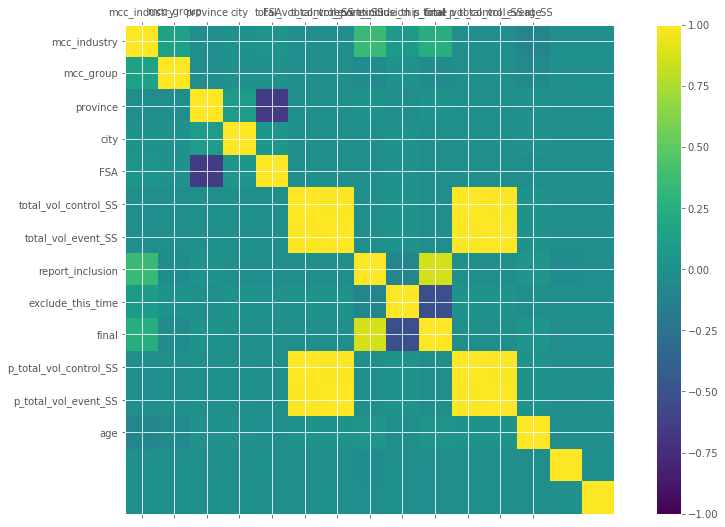

In [29]:
correlations = df_o.corr()
names=list(df_o.columns.values)
# plot correlation matrix
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1,interpolation='nearest')
fig.colorbar(cax)
ticks = np.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [30]:
df_o.corr()

,mcc_industry,mcc_group,province,city,FSA,total_vol_control_SS,total_vol_event_SS,report_inclusion,exclude_this_time,final,p_total_vol_control_SS,p_total_vol_event_SS,age,c_delta%,p_delta%
mcc_industry,1.000000,0.141284,-0.022462,0.022495,0.032568,-0.018266,-0.017860,0.345361,0.092952,0.247895,-0.019404,-0.018919,-0.089094,0.006107,0.001590
mcc_group,0.141284,1.000000,-0.017191,0.014464,0.013522,-0.015642,-0.015567,-0.029670,0.021936,-0.033991,-0.014654,-0.014572,-0.047870,0.003320,0.001583
province,-0.022462,-0.017191,1.000000,0.101983,-0.651303,0.003616,0.003952,0.026777,-0.012107,0.027244,0.003956,0.004425,0.009502,-0.001790,0.002650
city,0.022495,0.014464,0.101983,1.000000,0.047242,0.001742,0.001763,-0.001931,0.019132,-0.001103,0.001666,0.001687,0.010595,-0.000300,0.003270
FSA,0.032568,0.013522,-0.651303,0.047242,1.000000,-0.003989,-0.004769,-0.018098,0.011058,-0.015070,-0.004727,-0.005179,-0.020638,0.002771,-0.001152
total_vol_control_SS,-0.018266,-0.015642,0.003616,0.001742,-0.003989,1.000000,0.990692,-0.004458,0.024766,-0.016106,0.997123,0.990431,0.027244,-0.000747,-0.000214
total_vol_event_SS,-0.017860,-0.015567,0.003952,0.001763,-0.004769,0.990692,1.000000,-0.004403,0.024668,-0.016446,0.989273,0.997139,0.024503,-0.000137,0.000124
report_inclusion,0.345361,-0.029670,0.026777,-0.001931,-0.018098,-0.004458,-0.004403,1.000000,-0.079849,0.867387,-0.003446,-0.003040,0.041798,-0.026333,-0.018186
exclude_this_time,0.092952,0.021936,-0.012107,0.019132,0.011058,0.024766,0.024668,-0.079849,1.000000,-0.512960,0.024517,0.024269,-0.010510,0.001461,0.005337
final,0.247895,-0.033991,0.027244,-0.001103,-0.015070,-0.016106,-0.016446,0.867387,-0.512960,1.000000,-0.015218,-0.015001,0.032659,-0.023398,-0.016820


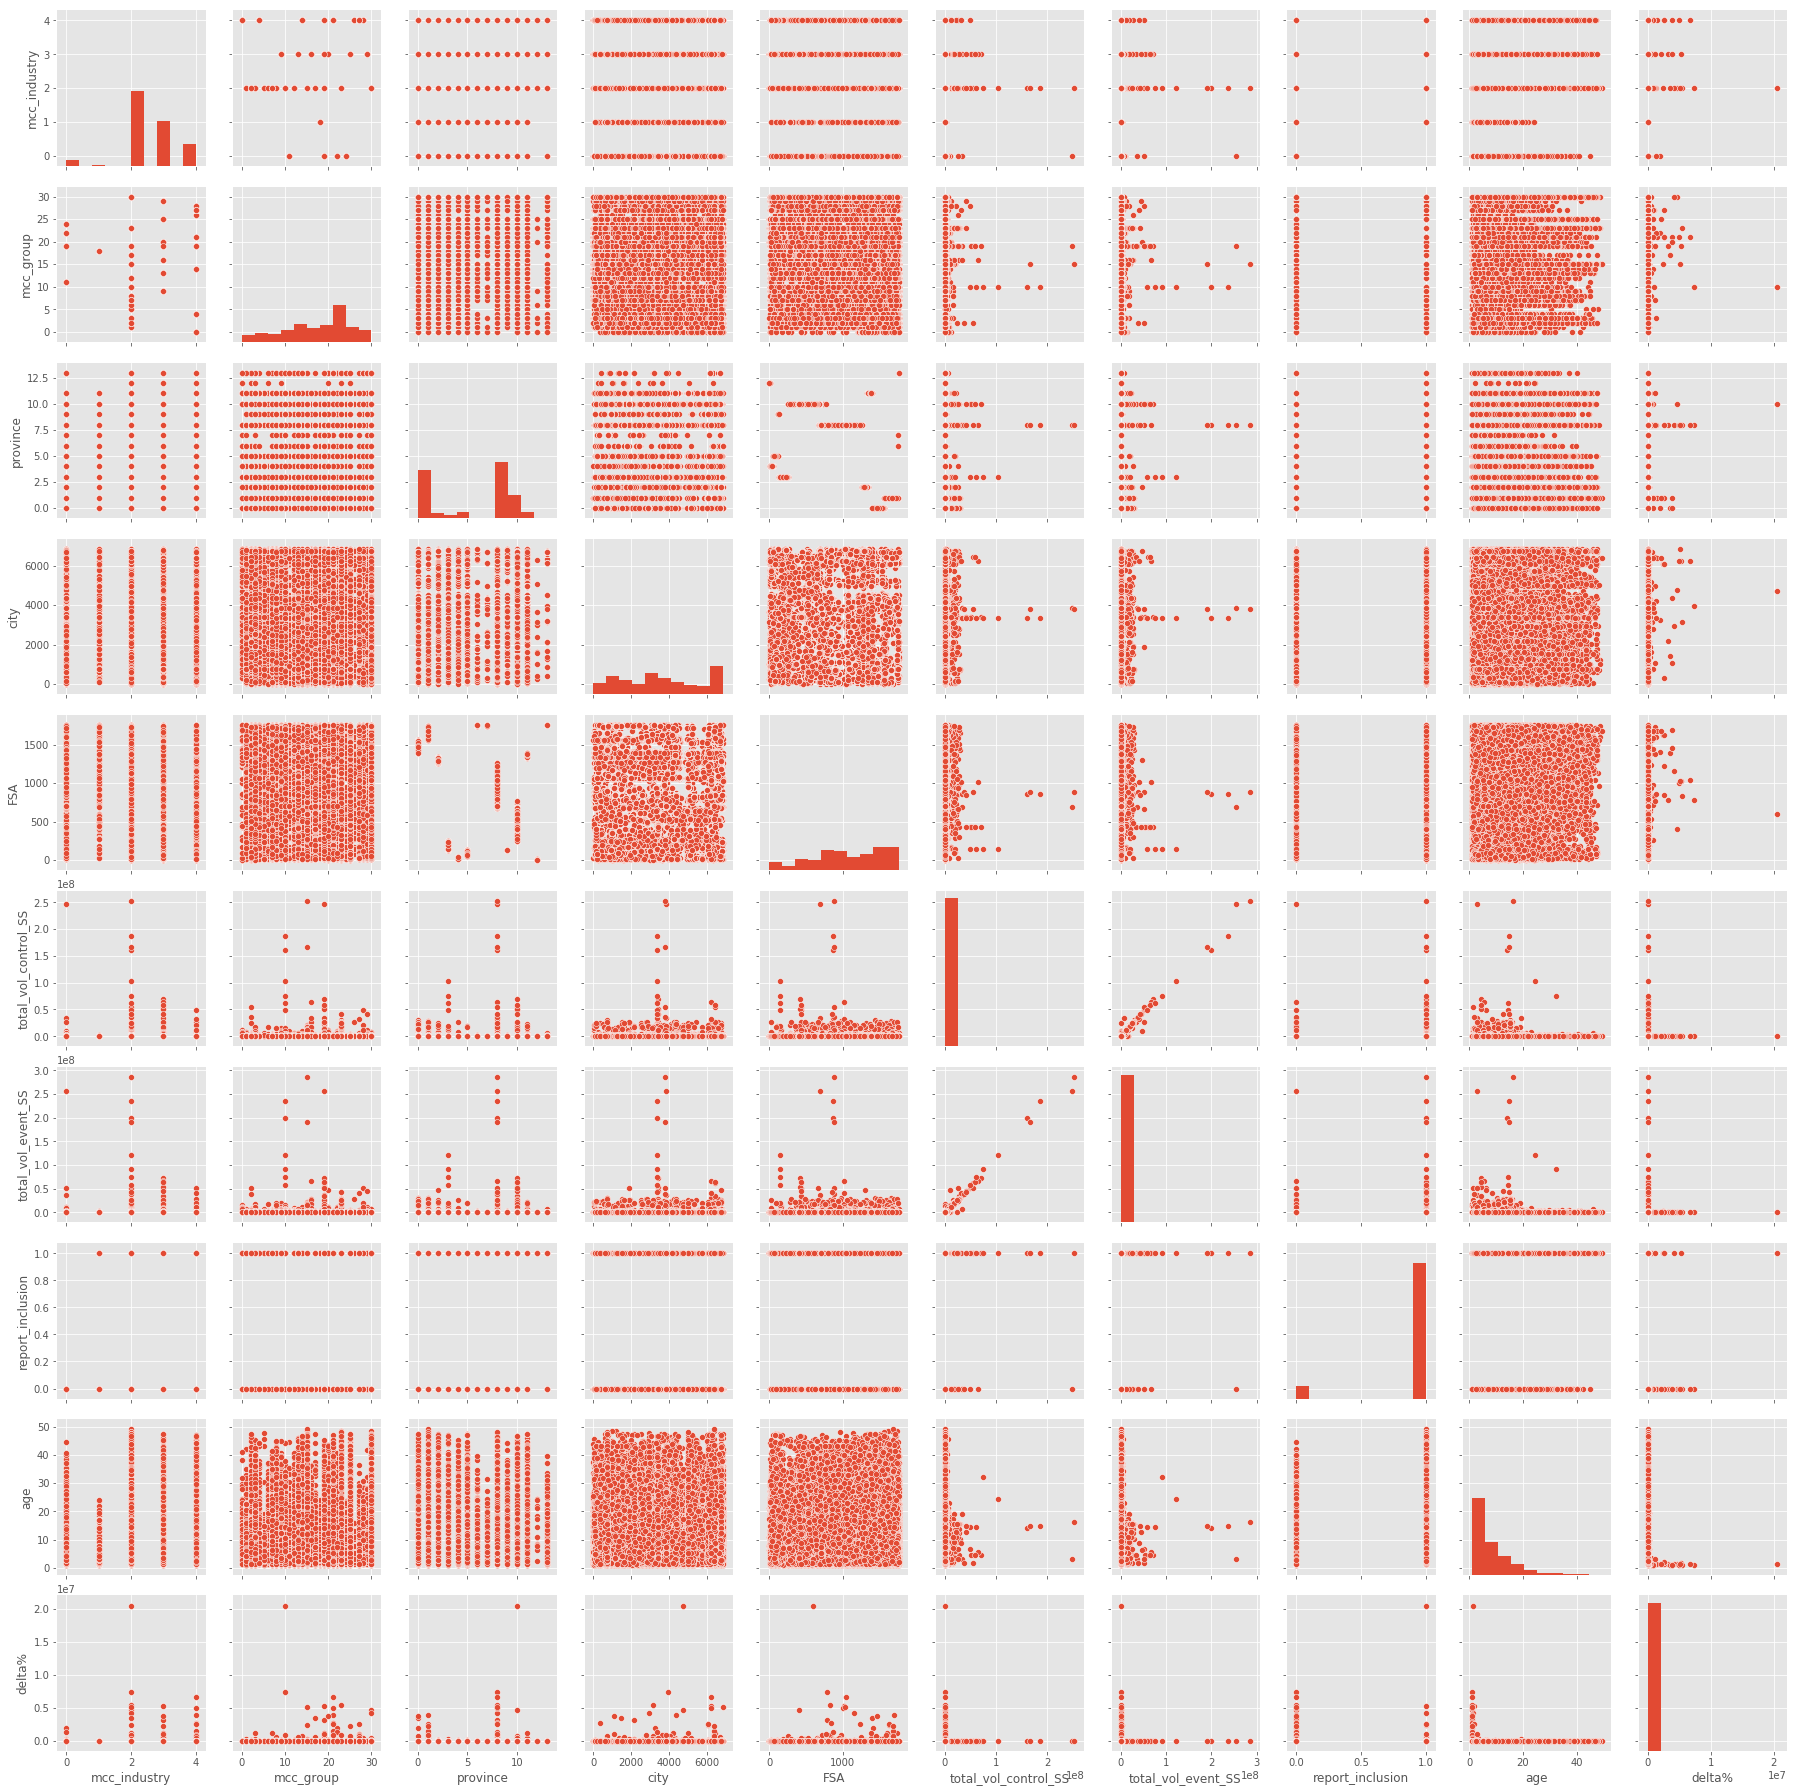

In [25]:
import seaborn as sns
sns.pairplot(df_o)
plt.show()

In [ ]:
#Isolation forest 
#https://www.kaggle.com/rgaddati/unsupervised-fraud-detection-isolation-forest

In [31]:
df_o=df_o.dropna()

In [32]:
y=df_o[['final']]

In [33]:
y[y==0].count()
#outlier 0

final    19302
dtype: int64

In [34]:
y[y==1].count()

final    177168
dtype: int64

In [35]:
y=y.squeeze()

In [30]:
y.shape
#y.values.ravel()

(203982,)

In [36]:
x=df_o.loc[:,'mcc_industry':'p_delta%']

In [37]:
x=x.drop(['report_inclusion','exclude_this_time','final'],axis=1)

In [38]:
x=x.drop(['total_vol_control_SS','total_vol_event_SS','p_total_vol_control_SS','p_total_vol_event_SS'],axis=1)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,stratify=y)

In [87]:
y_test.shape

(98235,)

In [43]:
#test randomforest
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
y_pred=RF.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
print(pd.DataFrame(confusion_matrix(y_test,y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

     pred_neg  pred_pos
neg      7083      2568
pos       585     87999


In [47]:
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [60,75,80],
           "max_depth" : [25,30,35]
}
 
CV_rfc = GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

{'max_depth': 35, 'n_estimators': 60}

In [88]:
y_pred_cv=CV_rfc.predict(x_test)

In [89]:
#Feature_importance
feature=['mcc_industry','mcc_group','province','city','FSA','age','c_delta%','p_delta%']
for f in zip(feature, CV_rfc.best_estimator_.feature_importances_):
    print(f)

('mcc_industry', 0.37258001299587634)
('mcc_group', 0.1875162618933835)
('province', 0.012167421221032293)
('city', 0.04349397829490401)
('FSA', 0.06095045671016778)
('age', 0.16678787409994342)
('c_delta%', 0.07701444209313517)
('p_delta%', 0.07948955269155752)


In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_cv)

0.9692573929862065

In [51]:
print(pd.DataFrame(confusion_matrix(y_test,y_pred_cv),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

     pred_neg  pred_pos
neg      6958      2693
pos       327     88257


In [52]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y_test,y_pred_cv))

             precision    recall  f1-score   support

          0       0.98      0.86      0.91      9651
          1       0.98      1.00      0.99     88584

avg / total       0.98      0.98      0.98     98235



In [54]:
from sklearn.metrics import roc_curve
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test,y_pred_cv)

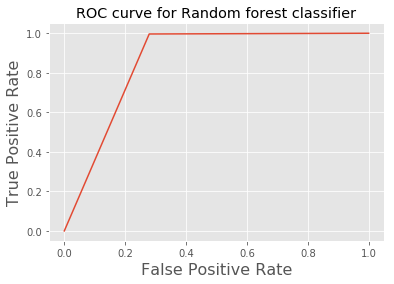

In [55]:
plt.plot(fpr_forest, tpr_forest)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve for Random forest classifier')
plt.show()

In [54]:
#prob score
#https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65

In [56]:
y_p_scores=CV_rfc.predict_proba(x_test)[:,1]

In [57]:
def adjusted_r (y_score, t):
    return [1 if y>=t else 0 for y in y_score ]

In [58]:
#need further plot of results to find tolerance level
y_p_ajdusted=adjusted_r(y_p_scores,0.4)

In [59]:
print(pd.DataFrame(confusion_matrix(y_test,y_p_ajdusted),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

     pred_neg  pred_pos
neg      6658      2993
pos       168     88416


In [60]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_test, y_p_scores)

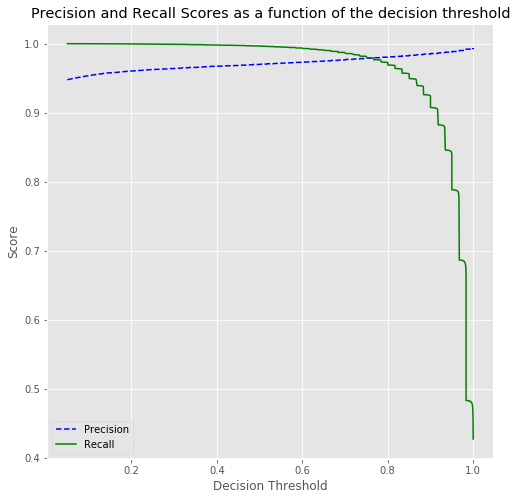

In [61]:
plt.figure(figsize=(8, 8))
plt.title("Precision and Recall Scores as a function of the decision threshold")
plt.plot(thresholds, p[:-1], "b--", label="Precision")
plt.plot(thresholds, r[:-1], "g-", label="Recall")
plt.ylabel("Score")
plt.xlabel("Decision Threshold")
plt.legend(loc='best')

In [ ]:
#verify result with original dataset

In [62]:
#trying multile ensemble algo
from sklearn.ensemble import AdaBoostClassifier

In [63]:
from sklearn.ensemble import AdaBoostClassifier
AdaB=AdaBoostClassifier(n_estimators=100)
AdaB.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [64]:
y_pred_A=AdaB.predict(x_test)

In [65]:
confusion_matrix(y_test,y_pred_A)

array([[ 6140,  3511],
       [  141, 88443]], dtype=int64)

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
GBC= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train, y_train)

In [68]:
y_pred_GBC=GBC.predict(x_test)

In [69]:
confusion_matrix(y_test,y_pred_GBC)

array([[ 5362,  4289],
       [   66, 88518]], dtype=int64)

In [70]:
import warnings 
warnings.filterwarnings('ignore')

In [71]:
from sklearn.ensemble import VotingClassifier
eclf=VotingClassifier(estimators=[('rf', CV_rfc), ('AdaB', AdaB), ('gbc', GBC)], voting='soft',weights=[6,2,2])
eclf.fit(x_train, y_train)

VotingClassifier(estimators=[('rf', GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            mi...         presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[6, 2, 2])

In [72]:
y_pred_vote=eclf.predict(x_test)

In [73]:
print(pd.DataFrame(confusion_matrix(y_test,y_pred_vote),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

     pred_neg  pred_pos
neg      6607      3044
pos       164     88420


In [74]:
print(classification_report(y_test,y_pred_vote))

             precision    recall  f1-score   support

          0       0.98      0.68      0.80      9651
          1       0.97      1.00      0.98     88584

avg / total       0.97      0.97      0.96     98235



In [91]:
y_pred_cv.shape

(98235,)

In [92]:
y_test.shape

(98235,)

In [93]:
y_test=pd.DataFrame(y_test)

In [94]:
#output predict result to invistigate orginal dataset
#using gridsearch cv result
y_test['Pred']=y_pred_cv

In [95]:
y_test.head()

,final,Pred
merchant_number,,
30203653425,1,1
30408656175,1,1
30203168101,1,1
30408084998,1,1
30206924096,1,1


In [96]:
df_test_r=pd.merge(df_2,y_test,how='right',on='merchant_number')

In [97]:
df_test_r.to_csv('result_6.csv',header=True, index=True)

In [59]:
y_test=y_test.drop(['Pred'],axis=1)

In [67]:
#performance is slow...
from sklearn.svm import SVC

In [69]:
svc=SVC(kernel='linear',class_weight='balanced',probability=True)

In [ ]:
svc.fit(x_train,y_train)

C:\Users\na.ma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred_svc=svc.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_G)

In [62]:
#naive bayes---results not good
from sklearn.naive_bayes import GaussianNB

In [66]:
confusion_matrix(y_test,y_pred_G)

array([[   39, 13172],
       [   11, 88769]], dtype=int64)

In [ ]:
#test with isolation forest weighed f1_score

In [215]:
forest = IsolationForest(contamination=0.08)
forest.fit(x_train,y_train)
y_pred_is=forest.predict(x_test)

In [216]:
print ('F1 score:', f1_score(y_test, y_pred_is,
                            average='weighted'))

F1 score: 0.9260336624528824
